## Dictonary Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [3]:
from skimage import color
from skimage import io

In [5]:
color_img = io.imread('datasets/image1.jpg')

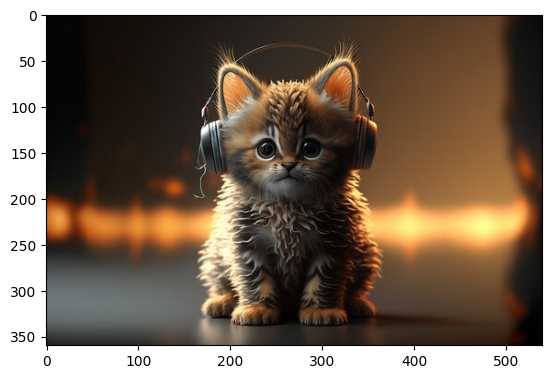

In [6]:
plt.imshow(color_img, cmap=plt.cm.gray)
plt.show()

In [7]:
img = color.rgb2gray(color_img)

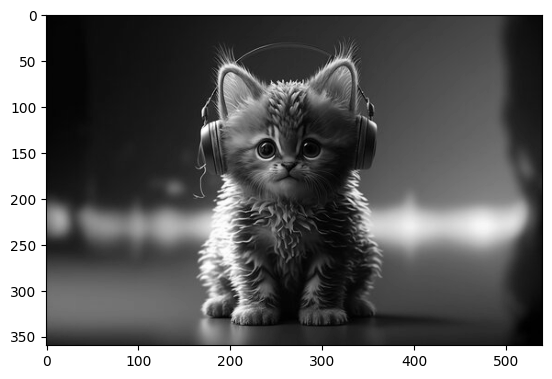

In [8]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [9]:
img.shape

(360, 540)

In [10]:
color_img.shape

(360, 540, 3)

In [11]:
height, width = img.shape

In [12]:
distorted_img = img.copy()

In [13]:
distorted_img

array([[0.05098039, 0.        , 0.01960784, ..., 0.03921569, 0.03529412,
        0.03137255],
       [0.05098039, 0.        , 0.01960784, ..., 0.03921569, 0.03529412,
        0.03137255],
       [0.05098039, 0.        , 0.01960784, ..., 0.03921569, 0.03529412,
        0.03137255],
       ...,
       [0.20335608, 0.14061098, 0.14453255, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.19159137, 0.13276784, 0.13668941, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.1876698 , 0.12492471, 0.13276784, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [14]:
distortion = 0.050 * np.random.randn(height, width // 2)
distortion.shape

(360, 270)

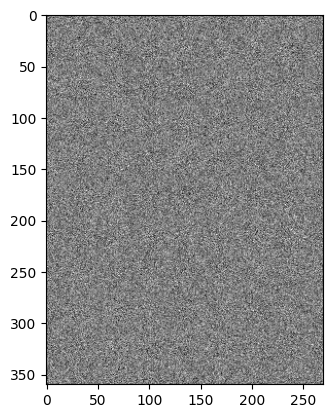

In [15]:
plt.imshow(distortion, cmap='gray')
plt.show()

In [16]:
distorted_img[:, width // 2:] += distortion

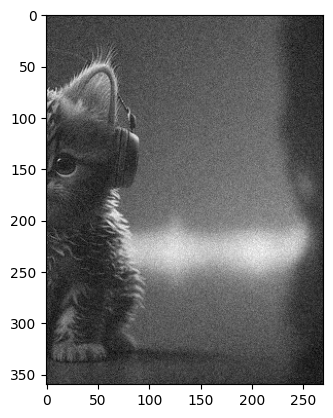

In [17]:
plt.imshow(distorted_img[:, width // 2:], cmap=plt.cm.gray)
plt.show()

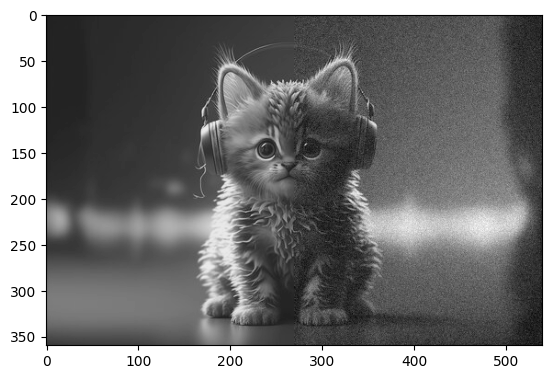

In [18]:
plt.imshow(distorted_img, cmap=plt.cm.gray)
plt.show()

In [31]:
patch_size = (7, 7)

data = extract_patches_2d(distorted_img[:, :width // 2], patch_size)

In [32]:
data.shape

(93456, 7, 7)

In [35]:
type(data)

numpy.ndarray

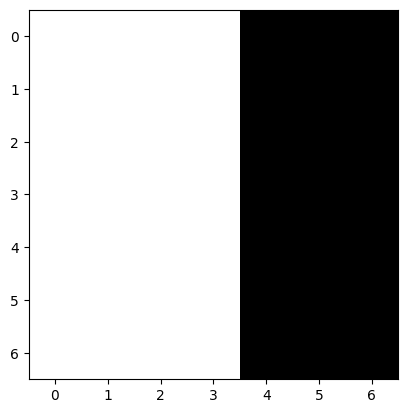

In [39]:
plt.imshow(data[93455], cmap=plt.cm.gray)
plt.show()

In [22]:
data = data.reshape(data.shape[0], -1)

In [23]:
data.shape

(93456, 49)

In [24]:
d_learning = MiniBatchDictionaryLearning(n_components=100,
                                         alpha=1,
                                         n_iter=1000)

components = d_learning.fit(data).components_
components

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/decomposition/_dict_learning.py:2350: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


array([[0.14064175, 0.14248657, 0.14890595, ..., 0.14733337, 0.14046797,
        0.13401462],
       [0.1399766 , 0.13973448, 0.13949505, ..., 0.14570369, 0.14573536,
        0.14573925],
       [0.07935993, 0.07301512, 0.06702894, ..., 0.25387929, 0.23364785,
        0.21517577],
       ...,
       [0.12297582, 0.13273232, 0.14305519, ..., 0.11199124, 0.13179856,
        0.14308718],
       [0.08174908, 0.15185933, 0.2330163 , ..., 0.09763666, 0.06391724,
        0.05831853],
       [0.25325016, 0.27243652, 0.27722643, ..., 0.09432804, 0.09710238,
        0.10722535]])

In [42]:
print(components.shape)
components[[99]]

(100, 49)


array([[0.25325016, 0.27243652, 0.27722643, 0.2707602 , 0.25319455,
        0.22742538, 0.20277949, 0.25637434, 0.23367336, 0.20269591,
        0.17016558, 0.14387259, 0.12545383, 0.11504744, 0.14076248,
        0.10840173, 0.08966379, 0.07720542, 0.0676751 , 0.06300181,
        0.06399134, 0.11051298, 0.09667077, 0.08768164, 0.08023633,
        0.07467542, 0.07201176, 0.07383941, 0.12043616, 0.10695088,
        0.09768443, 0.09009819, 0.08093805, 0.07499587, 0.07273181,
        0.12113973, 0.10918132, 0.09876504, 0.08868412, 0.08272526,
        0.07939213, 0.08403961, 0.12610928, 0.11628929, 0.10264486,
        0.09536086, 0.09432804, 0.09710238, 0.10722535]])

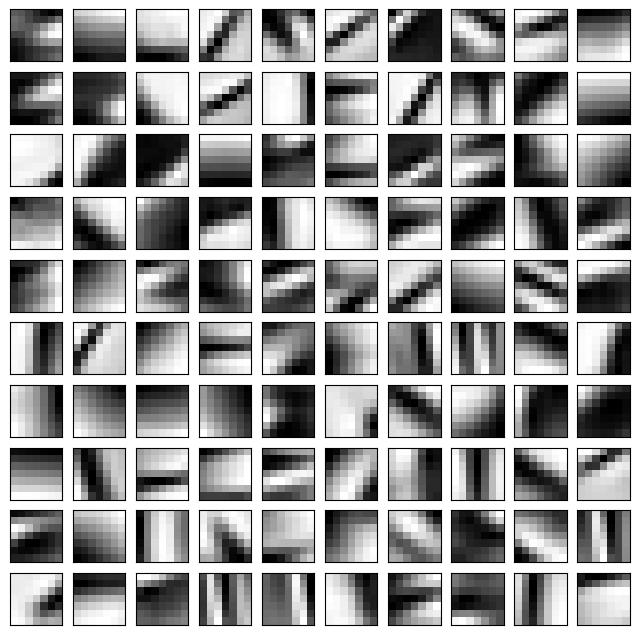

In [26]:
plt.figure(figsize = (8, 8))

for i, comp in enumerate(components):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size),
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.show()

In [43]:
right_data = extract_patches_2d(distorted_img[:,width//2:],patch_size)

In [44]:
right_data = right_data.reshape(right_data.shape[0], -1)

right_data.shape

(93456, 49)

In [45]:
d_learning.set_params(transform_n_nonzero_coefs = 1,
                      transform_algorithm = 'lars')

MiniBatchDictionaryLearning(n_components=100, n_iter=1000,
                            transform_algorithm='lars',
                            transform_n_nonzero_coefs=1)

In [46]:
code = d_learning.transform(right_data)

In [47]:
print('Shape of code: ',code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (93456, 100)
Shape of components:  (100, 49)


In [48]:
patches = np.dot(code, components)
patches.shape

(93456, 49)

In [49]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(93456, 7, 7)

In [50]:
reconstructed_img = img.copy()

In [51]:
reconstructed_img[:, width // 2:] = reconstruct_from_patches_2d(patches, (height, width // 2))

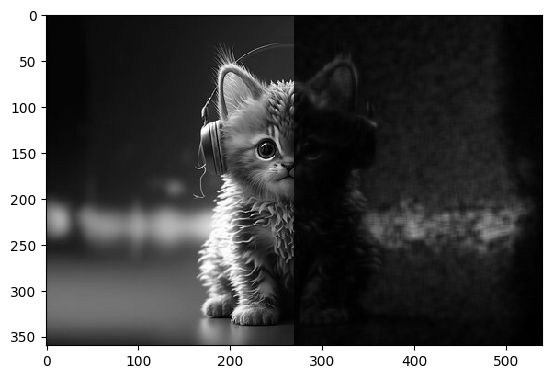

In [52]:
plt.imshow(reconstructed_img,
           cmap=plt.cm.gray,
           interpolation='nearest',
           vmin=0,
           vmax=1)
plt.show()

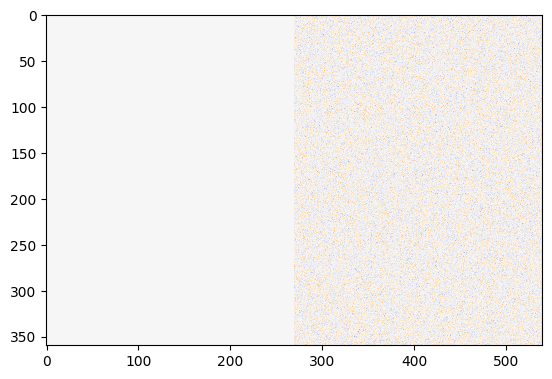

In [53]:
difference = img - distorted_img

plt.imshow(difference,
           cmap=plt.cm.PuOr,
           interpolation='nearest',
           vmin=-0.5,
           vmax=0.5)
plt.show()

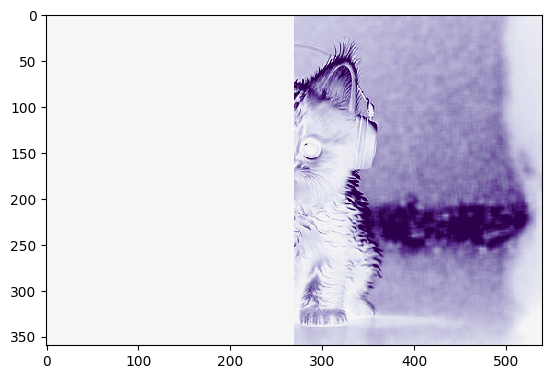

In [54]:
difference = img - reconstructed_img

plt.imshow(difference,
           cmap=plt.cm.PuOr,
           interpolation='nearest',
           vmin=-0.5,
           vmax=0.5)
plt.show()

In [56]:
d_learning.set_params(transform_n_nonzero_coefs = 1,
                      transform_algorithm = 'omp')

MiniBatchDictionaryLearning(n_components=100, n_iter=1000,
                            transform_n_nonzero_coefs=1)

In [57]:
code = d_learning.transform(right_data)

print('Shape of code: ',code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (93456, 100)
Shape of components:  (100, 49)


In [58]:
patches = np.dot(code, components)
patches.shape
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(93456, 7, 7)

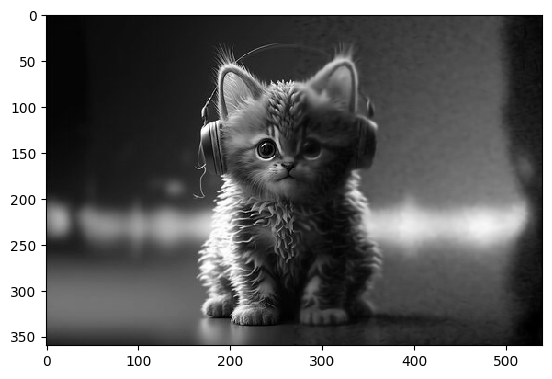

In [59]:
reconstructed_img = img.copy()
reconstructed_img[:, width // 2:] = reconstruct_from_patches_2d(patches, (height, width // 2))

plt.imshow(reconstructed_img,
           cmap=plt.cm.gray,
           interpolation='nearest',
           vmin=0,
           vmax=1)
plt.show()

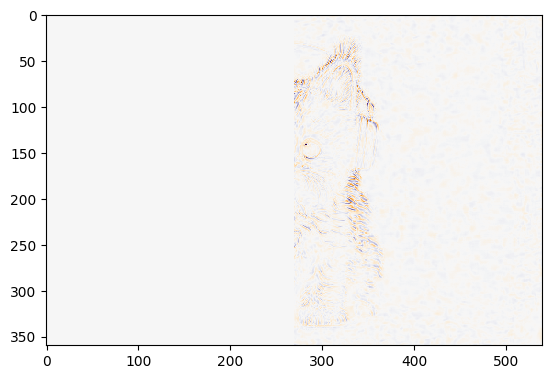

In [60]:
difference = img - reconstructed_img

plt.imshow(difference,
           cmap=plt.cm.PuOr,
           interpolation='nearest',
           vmin=-0.5,
           vmax=0.5)
plt.show()